Multiple Linear Regression
In this regression, there are many independent variables instead of one and one dependent variable.

The equation of multiple linear regressions is: y = c0 + x1c1 + x2c2 + ...

Here it tries to calculate the values of c1, c2, c3,... and so on.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
import seaborn as sns

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/regression/house_pricing.csv")
df

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19
...,...,...,...,...,...,...
809,SACRAMENTO,Residential,4,3,2280,308248.47
810,SACRAMENTO,Residential,3,2,1477,212857.63
811,CITRUS HEIGHTS,Residential,3,2,1216,181746.98
812,ELK GROVE,Residential,4,2,1685,245385.59


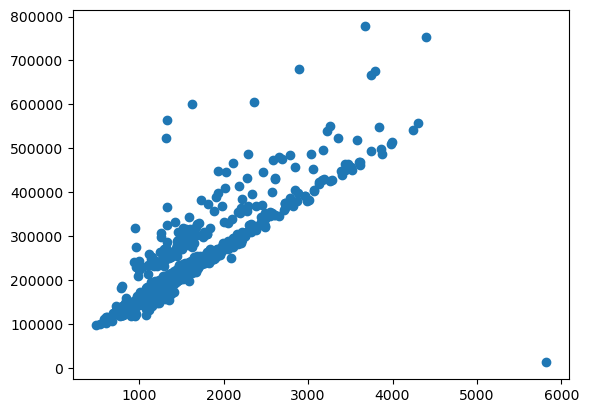

In [51]:
# Checking relation between Area and Price
plt.scatter(df.SquareFeet, df.Price)

With a change in area, there is a change in price. This is because price is dependent on the area of land.

Since with increase in area, there is an increase in price, this shows a positive correlation.

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

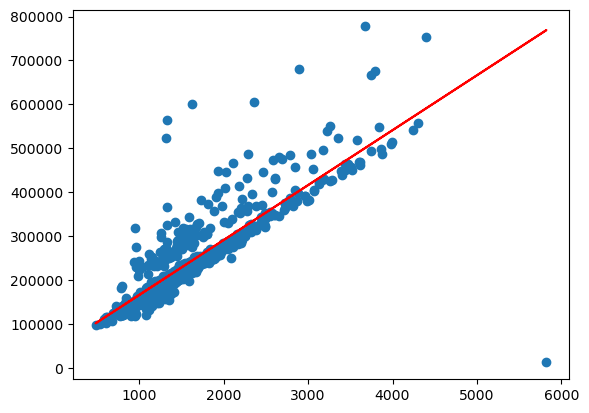

In [53]:
model.fit(df[['SquareFeet']], df.Price)
pred = model.predict(df[['SquareFeet']])

plt.scatter(df.SquareFeet, df.Price)
plt.plot(df.SquareFeet, pred, color='red')

In [54]:
# Taking out pearson correlation of Price
pc = df.SquareFeet.corr(df.Price)
print(pc)

0.8517550354760818


In [55]:
# Taking out correlation with all other numeric data types
df.select_dtypes(include='number').corrwith(df.Price)

Beds          0.609677
Baths         0.632218
SquareFeet    0.851755
Price         1.000000
dtype: float64

If the value is close to 0, then no correlation.
If it is close to 1, then positive correlation.
If it is close to -1, then negative correlation.

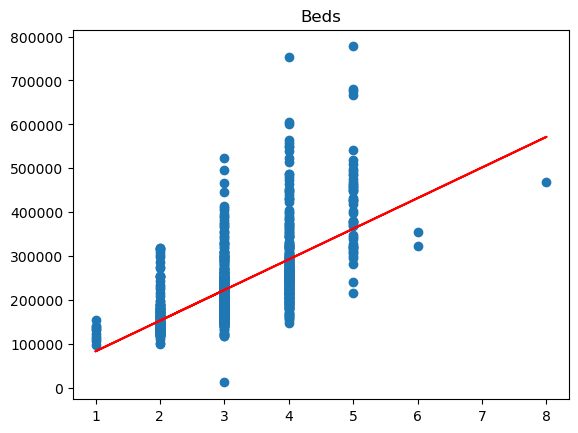

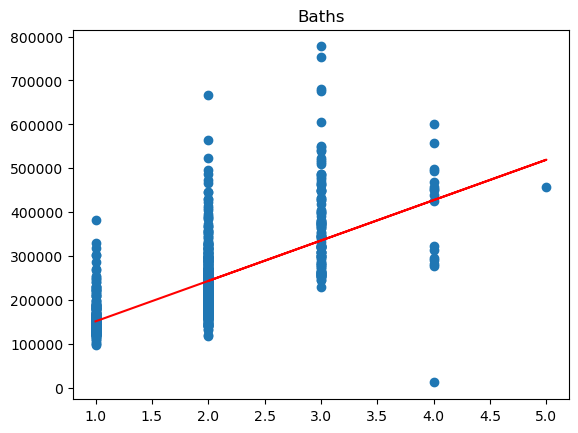

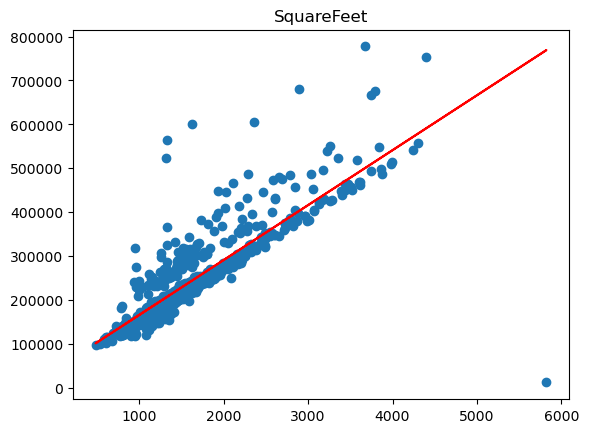

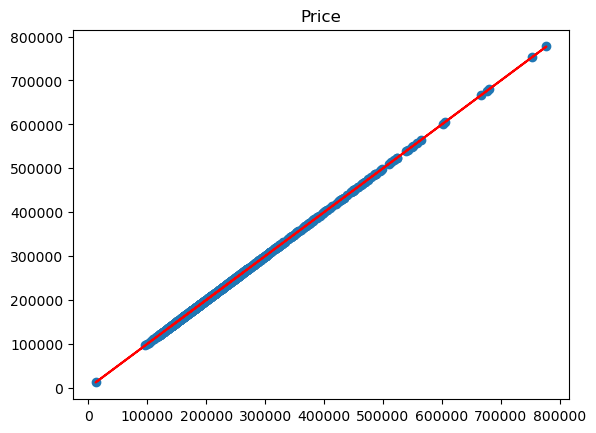

In [56]:
# Printing charts with each of the numeric columns
columns = df.select_dtypes(include='number')
for column in columns:
    plt.scatter(df[column], df.Price)
    plt.title(column)
    model = LinearRegression()
    model.fit(df[[column]], df.Price)
    plt.plot(df[column], model.predict(df[[column]]), color='red')
    plt.show()

For categorical independent variables with numerical target, we will do:
1. BoxPlot Analysis
2. Anova Test:
    - Null Hypothesis: Means of the groups are equal
    - If p-value < 0.05, reject null hypothesis
    - If p-value > 0.05, fail to reject null hypothesis

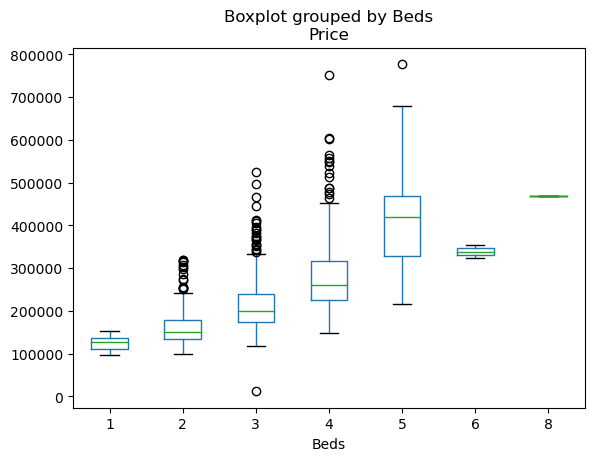

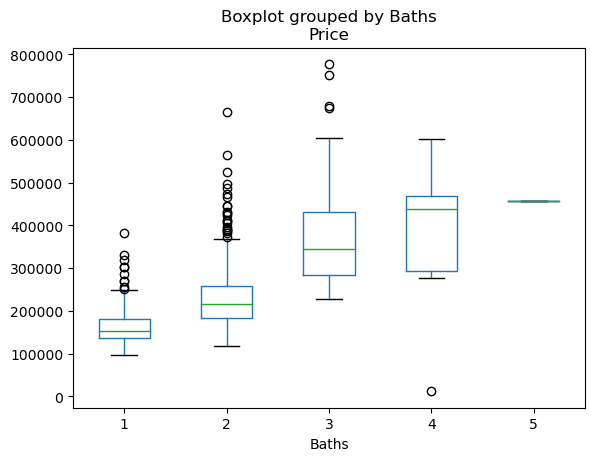

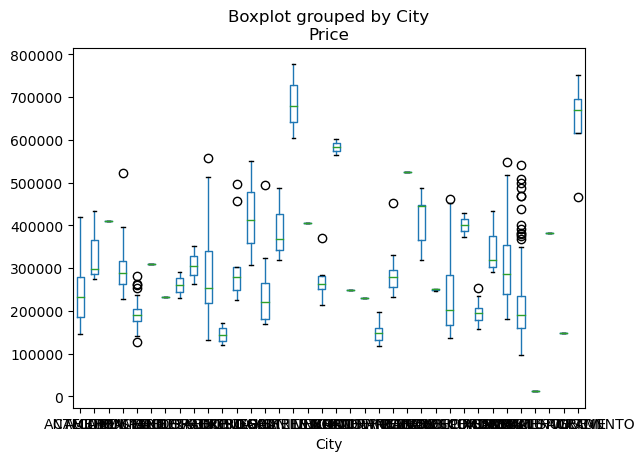

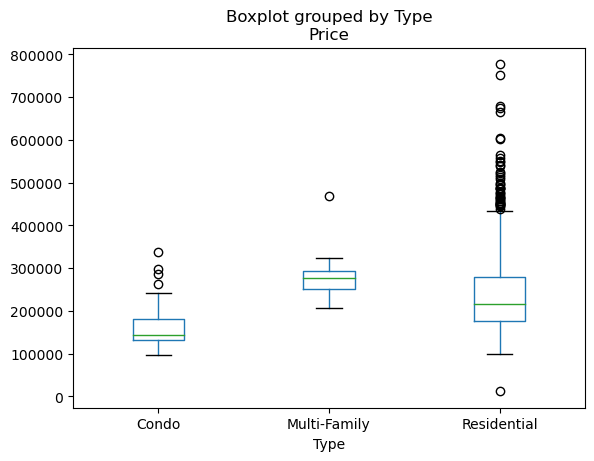

In [57]:
category_columns = ['Beds', 'Baths', 'City', 'Type']
for column in category_columns:
    df.boxplot(column='Price', by=column, grid=False)
    plt.show()

In [58]:
# We select the columns which are showing a positive correlation with the target
selected_columns = ['SquareFeet', 'Beds', 'Baths', 'Type']
x = df[selected_columns]
y = df.Price

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [60]:
num_columns = x.select_dtypes(include='number').columns
cat_columns = x.select_dtypes(include='object').columns
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
])
model = Pipeline([
    ('pre', preprocessor),
    ('lr', LinearRegression())
])
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SquareFeet', 'Beds', 'Baths'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Type'], dtype='object'))])),
                ('lr', LinearRegression())])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
print("Training Results")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R2:", r2_score(y_train, y_train_pred))

Training Results
MSE: 2721604798.609121
MAE: 26495.166169628763
R2: 0.7201571511842687


In [64]:
print("Testing Results")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R2:", r2_score(y_test, y_test_pred))

Testing Results
MSE: 2146974115.9234219
MAE: 27742.635128196547
R2: 0.7503741973439974
